In [2]:
import json
import pandas as pd
import numpy as np
import re
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


In [3]:
file_dir = '/Users/Joshua/desktop/playlist'

with open(f'{file_dir}/challenge_set.json', mode='r') as file:
    playlist = json.load(file)

In [4]:
len(playlist)

5

In [5]:
p_df = pd.DataFrame(playlist)


In [6]:
p_df

,date,version,playlists,name,description
0,2018-01-16 08:47:28.198015,v1,"{'name': 'spanish playlist', 'num_holdouts': 1...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
1,2018-01-16 08:47:28.198015,v1,"{'name': 'Groovin', 'num_holdouts': 48, 'pid':...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
2,2018-01-16 08:47:28.198015,v1,"{'name': 'uplift', 'num_holdouts': 40, 'pid': ...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
3,2018-01-16 08:47:28.198015,v1,"{'name': 'WUBZ', 'num_holdouts': 27, 'pid': 10...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
4,2018-01-16 08:47:28.198015,v1,"{'name': 'new', 'num_holdouts': 41, 'pid': 100...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
...,...,...,...,...,...
9995,2018-01-16 08:47:28.198015,v1,"{'name': 'Playlist 2015', 'num_holdouts': 20, ...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
9996,2018-01-16 08:47:28.198015,v1,"{'name': 'Workout', 'num_holdouts': 24, 'pid':...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
9997,2018-01-16 08:47:28.198015,v1,"{'name': 'Girlz', 'num_holdouts': 16, 'pid': 1...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
9998,2018-01-16 08:47:28.198015,v1,"{'name': 'let's get lost', 'num_holdouts': 35,...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018


In [90]:
p_df.count()

date           10000
version        10000
playlists      10000
name           10000
description    10000
dtype: int64

In [8]:
playlist.keys()

dict_keys(['date', 'version', 'playlists', 'name', 'description'])

In [9]:
from pandas import json_normalize
df = json_normalize(playlist['playlists'])

In [94]:
df.tail(50)
# Need 'tracks[]'

,name,num_holdouts,pid,num_tracks,tracks,num_samples,playlist_id,has_tracks
9950,Some Stuff,19,1006611,20,"[{'pos': 0, 'artist_name': 'St. Lucia', 'track...",1,9950,True
9951,Drops,15,1006612,16,"[{'pos': 0, 'artist_name': 'Jordan Comolli', '...",1,9951,True
9952,Car Jams,11,1006613,12,"[{'pos': 0, 'artist_name': 'The Vamps', 'track...",1,9952,True
9953,Fav songs,17,1006614,18,"[{'pos': 0, 'artist_name': 'Chance The Rapper'...",1,9953,True
9954,80s,38,1006615,39,"[{'pos': 0, 'artist_name': 'Whitney Houston', ...",1,9954,True
9955,*running,25,1006617,26,"[{'pos': 0, 'artist_name': 'Kid Ink', 'track_u...",1,9955,True
9956,High School Musical,36,1006619,37,"[{'pos': 0, 'artist_name': 'High School Musica...",1,9956,True
9957,Sleep Music,21,1006623,22,"[{'pos': 0, 'artist_name': 'Ed Sheeran', 'trac...",1,9957,True
9958,songs 1,36,1006625,37,"[{'pos': 0, 'artist_name': 'Houndmouth', 'trac...",1,9958,True
9959,Best I Ever Had,18,1006633,19,"[{'pos': 0, 'artist_name': 'Drake', 'track_uri...",1,9959,True


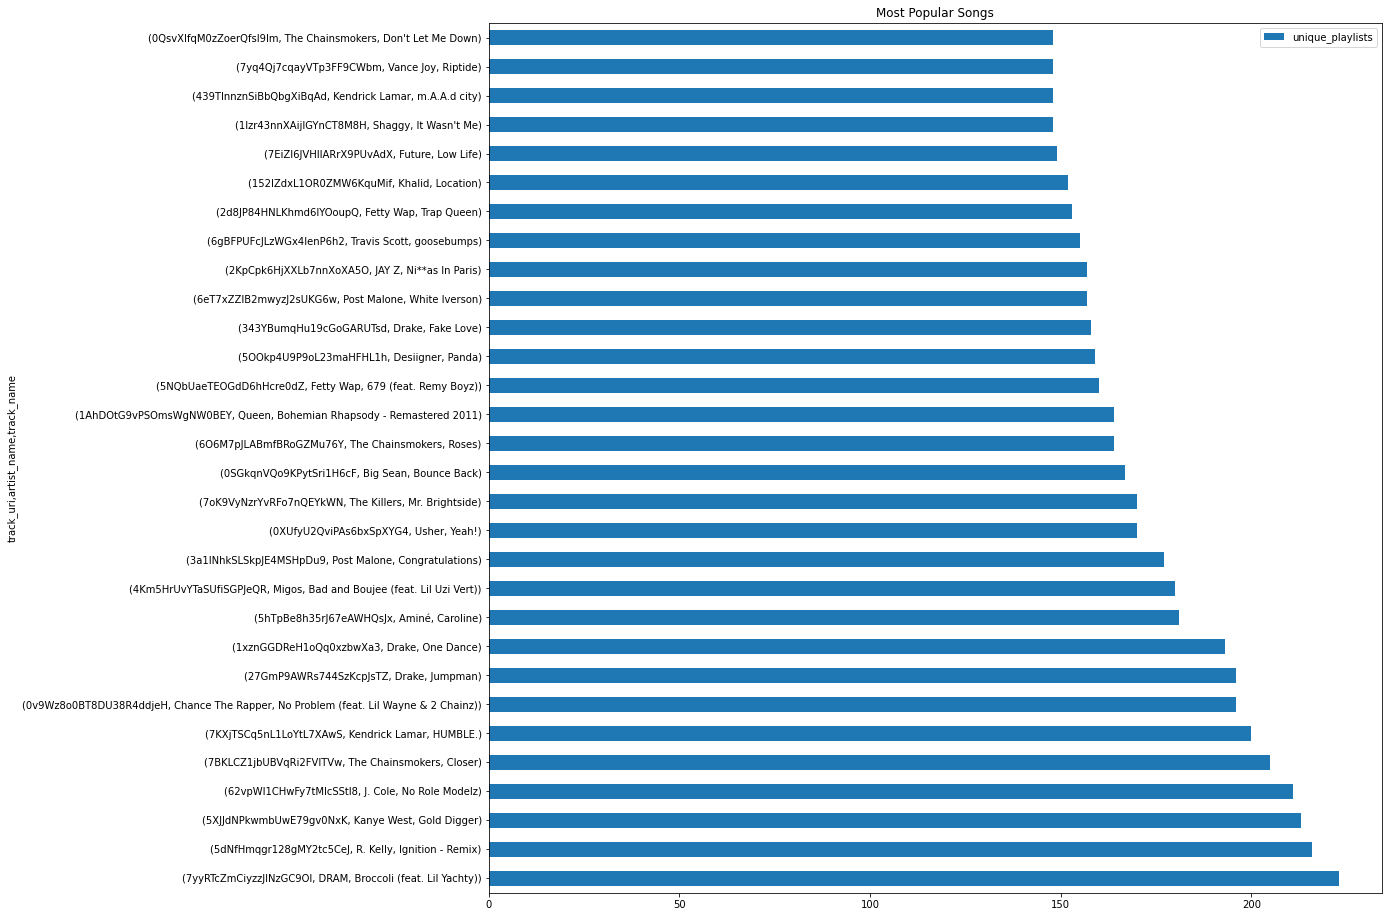

In [68]:
# Helper code to extract an Array from JSON

# Loading the data and making an index (everyrow is a playlist, just adding an id to id):
df = pd.DataFrame(playlist['playlists'])
df['playlist_id'] = df.index

# Keep only playlists with tracks:
df['has_tracks'] = df['tracks'].apply(len)>0
df = df[df['has_tracks']]

# "Exploding " all tracks so you get one track per row. It will add one row per track 
# useful for nested lists inside a field in pandas:
df_1 = df[['tracks']].explode('tracks')
df_2 = pd.DataFrame(df_1['tracks'].values.tolist())
df_2.index = df_1.index

# join back to the original dataset:
df_3 = df.join(df_2).drop('tracks', axis=1)

# clean up track_uri to not have spotify:track: in name [done]
df_3['track_uri'] = df_3['track_uri'].map(lambda x: x.lstrip('spotify:track:'))
df_3['artist_uri'] = df_3['artist_uri'].map(lambda x: x.lstrip('spotify:track:'))


# Most Popular Songs graph
df_3.groupby(['track_uri','artist_name','track_name'])\
    .agg(unique_playlists=('playlist_id','nunique'))\
    .sort_values('unique_playlists', ascending=False)\
    .head(30).plot(kind='barh', figsize=(16,16), title='Most Popular Songs');


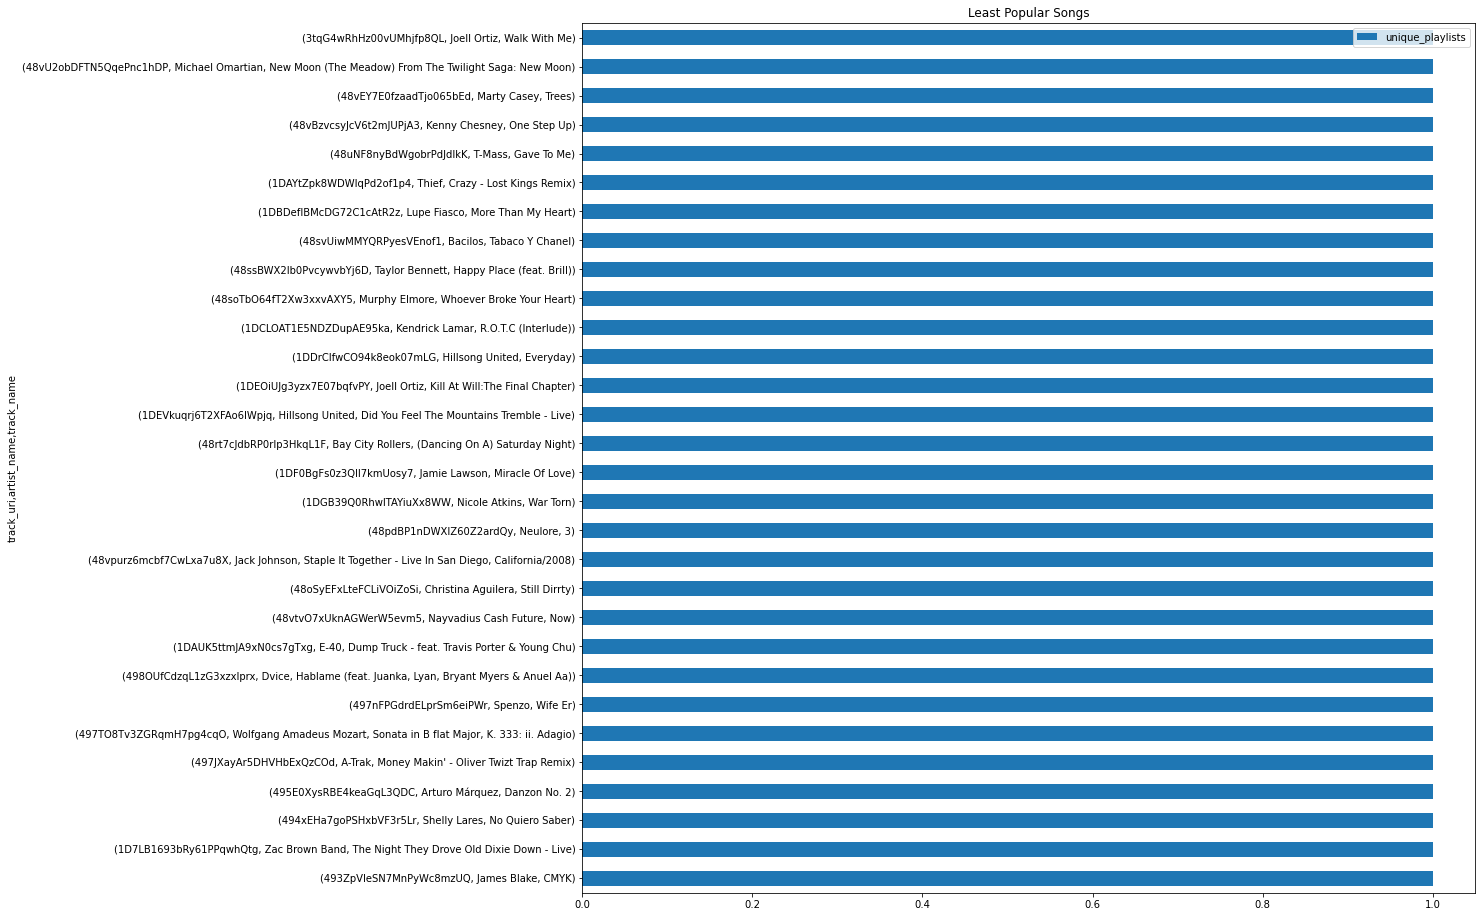

In [69]:
# Least Popular Songs graph
df_3.groupby(['track_uri','artist_name','track_name'])\
    .agg(unique_playlists=('playlist_id','nunique'))\
    .sort_values('unique_playlists', ascending=False)\
    .tail(30).plot(kind='barh', figsize=(16,16), title='Least Popular Songs');

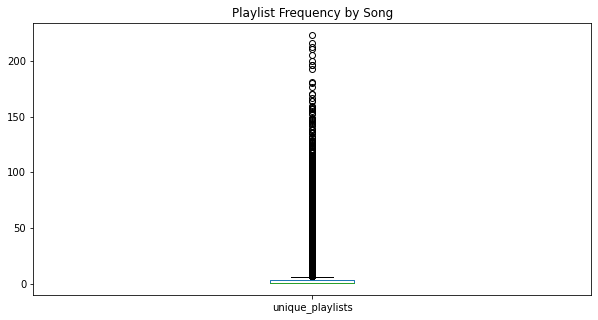

In [70]:
# Distribution graph
df_3.groupby(['track_uri'])\
    .agg(unique_playlists=('playlist_id','nunique'))\
    .sort_values('unique_playlists', ascending=False)\
    .plot(kind='box', figsize=(10,5), title='Playlist Frequency by Song');

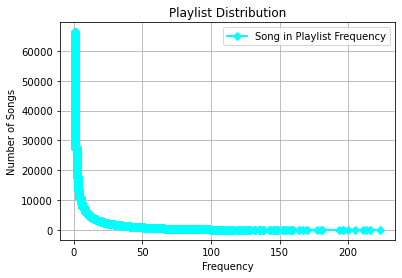

In [71]:
y_axis = pd.Series(range(0,66243))
x_axis = df_4['unique_playlists']

# Create the plot.
plt.plot(x_axis, y_axis, marker="D", color="cyan", linewidth=2, label='Song in Playlist Frequency')
# Create labels for the x and y axes.
plt.xlabel("Frequency")
plt.ylabel("Number of Songs")
# Set the y limit between 0 and 45.

# Create a title.
plt.title("Playlist Distribution")
# Add a grid.
plt.grid()
# Add the legend.
plt.legend()

In [72]:
df_3.count()

name            266000
num_holdouts    281000
pid             281000
num_tracks      281000
num_samples     281000
playlist_id     281000
has_tracks      281000
pos             281000
artist_name     281000
track_uri       281000
artist_uri      281000
track_name      281000
album_uri       281000
duration_ms     281000
album_name      281000
dtype: int64

In [73]:

df.head()

,name,num_holdouts,pid,num_tracks,tracks,num_samples,playlist_id,has_tracks
1000,Party,70,1000000,75,"[{'pos': 0, 'artist_name': 'AronChupa', 'track...",5,1000,True
1001,school,73,1000016,78,"[{'pos': 0, 'artist_name': 'Alesso', 'track_ur...",5,1001,True
1002,Modern Music,63,1000020,68,"[{'pos': 0, 'artist_name': 'Banks', 'track_uri...",5,1002,True
1003,lit 2.0,49,1000023,54,"[{'pos': 0, 'artist_name': 'Galantis', 'track_...",5,1003,True
1004,bbq,71,1000040,76,"[{'pos': 0, 'artist_name': 'Stick Figure', 'tr...",5,1004,True


In [74]:
df_1.head()

,tracks
1000,"{'pos': 0, 'artist_name': 'AronChupa', 'track_..."
1000,"{'pos': 1, 'artist_name': 'AronChupa', 'track_..."
1000,"{'pos': 2, 'artist_name': 'Lorde', 'track_uri'..."
1000,"{'pos': 3, 'artist_name': 'Lorde', 'track_uri'..."
1000,"{'pos': 4, 'artist_name': 'Lorde', 'track_uri'..."


In [75]:
df_2.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
1000,0,AronChupa,spotify:track:66U0ASk1VHZsqIkpMjKX3B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing
1000,1,AronChupa,spotify:track:5MhsZlmKJG6X5kTHkdwC4B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz
1000,2,Lorde,spotify:track:0GZoB8h0kqXn7XFm4Sj06k,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Yellow Flicker Beat - From The Hunger Games: M...,spotify:album:4UEPxQx0cTcYNsE0n32MHV,232506,Yellow Flicker Beat
1000,3,Lorde,spotify:track:35kahykNu00FPysz3C2euR,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,White Teeth Teens,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,216600,Pure Heroine
1000,4,Lorde,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine


In [76]:
df_3.head()

,name,num_holdouts,pid,num_tracks,num_samples,playlist_id,has_tracks,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
1000,Party,70,1000000,75,5,1000,True,0,AronChupa,66U0ASk1VHZsqIkpMjKX3B,5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing
1000,Party,70,1000000,75,5,1000,True,1,AronChupa,5MhsZlmKJG6X5kTHkdwC4B,5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz
1000,Party,70,1000000,75,5,1000,True,2,Lorde,0GZoB8h0kqXn7XFm4Sj06k,163tK9Wjr9P9DmM0AVK7lm,Yellow Flicker Beat - From The Hunger Games: M...,spotify:album:4UEPxQx0cTcYNsE0n32MHV,232506,Yellow Flicker Beat
1000,Party,70,1000000,75,5,1000,True,3,Lorde,35kahykNu00FPysz3C2euR,163tK9Wjr9P9DmM0AVK7lm,White Teeth Teens,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,216600,Pure Heroine
1000,Party,70,1000000,75,5,1000,True,4,Lorde,3G6hD9B2ZHOsgf4WfNu7X1,163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine


In [77]:
df_4 = df_3.groupby(['track_uri','artist_name','track_name', 'artist_uri'])\
    .agg(unique_playlists=('playlist_id','nunique'))\
    .sort_values('unique_playlists', ascending=False)\


In [78]:
df_4.head()

,,,,unique_playlists
track_uri,artist_name,track_name,artist_uri,
7yyRTcZmCiyzzJlNzGC9Ol,DRAM,Broccoli (feat. Lil Yachty),5M0lbkGluOPXLeFjApw8r8,223
5dNfHmqgr128gMY2tc5CeJ,R. Kelly,Ignition - Remix,2mxe0TnaNL039ysAj51xPQ,216
5XJJdNPkwmbUwE79gv0NxK,Kanye West,Gold Digger,5K4W6rqBFWDnAN6FQUkS6x,213
62vpWI1CHwFy7tMIcSStl8,J. Cole,No Role Modelz,6l3HvQ5sa6mXTsMTB19rO5,211
7BKLCZ1jbUBVqRi2FVlTVw,The Chainsmokers,Closer,69GGBxA162lTqCwzJG5jLp,205


In [79]:
df_4.count()

unique_playlists    66243
dtype: int64

In [80]:
df_4.describe()

,unique_playlists
count,66243.000000
mean,4.206950
std,10.642304
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,223.000000


In [91]:
# df_4.to_csv('playlist_frequency.csv')
df_4.to_csv('/Users/Joshua/Desktop/playlist_frequency.csv')



In [82]:
df_5 = df_4.value_counts('unique_playlists')

In [83]:
df_5.tail()

unique_playlists
117    1
120    1
131    1
129    1
223    1
dtype: int64

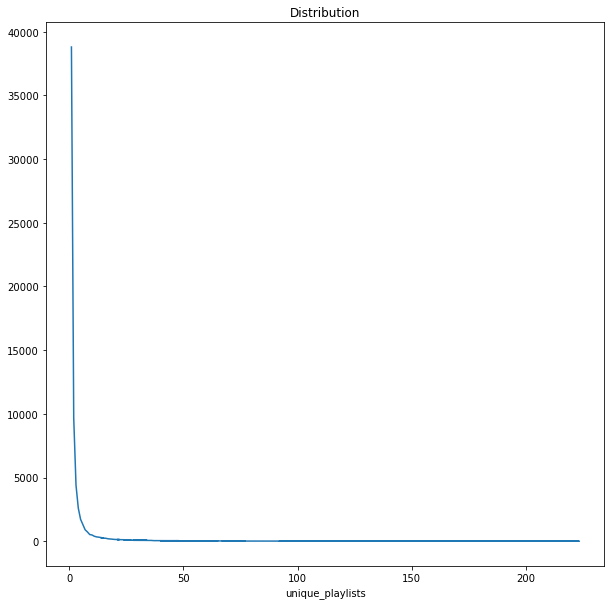

In [84]:
df_5.plot(kind='line', figsize=(10,10), title='Distribution');

In [85]:
df_5.describe()

count      162.000000
mean       408.907407
std       3157.779778
min          1.000000
25%          2.000000
50%         10.000000
75%         39.000000
max      38801.000000
dtype: float64

In [86]:
df_5.to_csv('/Users/Joshua/Desktop/frequency_count.csv')


In [87]:
df_4.isnull()

,,,,unique_playlists
track_uri,artist_name,track_name,artist_uri,
7yyRTcZmCiyzzJlNzGC9Ol,DRAM,Broccoli (feat. Lil Yachty),5M0lbkGluOPXLeFjApw8r8,False
5dNfHmqgr128gMY2tc5CeJ,R. Kelly,Ignition - Remix,2mxe0TnaNL039ysAj51xPQ,False
5XJJdNPkwmbUwE79gv0NxK,Kanye West,Gold Digger,5K4W6rqBFWDnAN6FQUkS6x,False
62vpWI1CHwFy7tMIcSStl8,J. Cole,No Role Modelz,6l3HvQ5sa6mXTsMTB19rO5,False
7BKLCZ1jbUBVqRi2FVlTVw,The Chainsmokers,Closer,69GGBxA162lTqCwzJG5jLp,False
...,...,...,...,...
48uNF8nyBdWgobrPdJdIkK,T-Mass,Gave To Me,0M3cZtjQZ8fz3Hbw1A4CwF,False
48vBzvcsyJcV6t2mJUPjA3,Kenny Chesney,One Step Up,3grHWM9bx2E9vwJCdlRv9O,False
48vEY7E0fzaadTjo065bEd,Marty Casey,Trees,0J7ESdJjIJ5tvkH7r78r6c,False
